In [1]:
import pandas as pd

In [2]:
import matplotlib as plt

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [7]:
df=pd.read_csv(r'Sales_Of_Shampoo_Damped_Trend - Python.csv')

In [8]:
df

,Date,Yt
0,1/1/1992,266.0
1,1/1/1993,145.9
2,1/1/1994,183.1
3,1/1/1995,119.3
4,1/1/1996,180.3
5,1/1/1997,168.5
6,1/1/1998,231.8
7,1/1/1999,224.5
8,1/1/2000,192.8
9,1/1/2001,122.9


In [9]:
df=df.set_index("Date")

In [10]:
split=round(len(df)*0.75)
train=df.iloc[:split,0]
validation=df.iloc[split:,0]
train_df=pd.DataFrame(train)
validation_df=pd.DataFrame(validation)
validation_df

,Yt
Date,
1/1/2019,439.3
1/1/2020,401.3
1/1/2021,437.4
1/1/2022,575.5
1/1/2023,407.6
1/1/2024,682.0
1/1/2025,475.3
1/1/2026,581.3
1/1/2027,646.9


<AxesSubplot:xlabel='Date'>

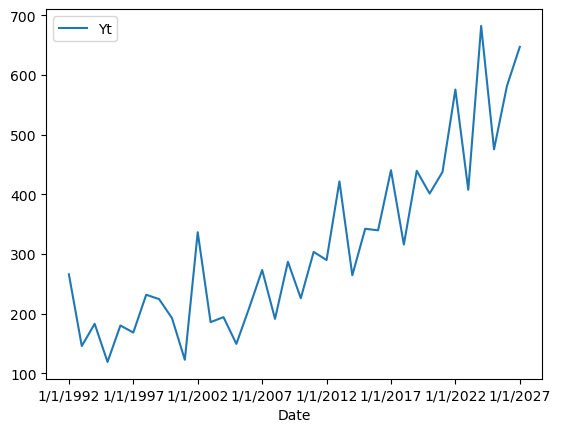

In [11]:
df.plot()

<AxesSubplot:xlabel='Date'>

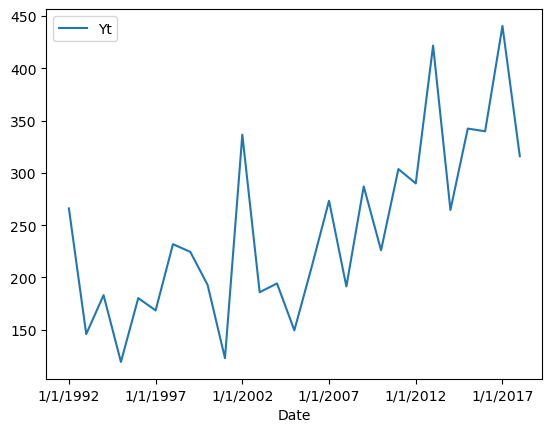

In [12]:
train_df.plot()

In [13]:
adfuller(train_df)

(0.22292306566403475,
 0.9735183667298979,
 3,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 193.70575395922398)

In [14]:
model = Holt(train_df,initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,198476.015
Optimized:,False,AIC,248.370
Trend:,Additive,BIC,253.553
Seasonal:,None,AICC,252.570
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [15]:
model = Holt(train_df,initialization_method="heuristic").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,198476.015
Optimized:,False,AIC,248.370
Trend:,Additive,BIC,253.553
Seasonal:,None,AICC,252.570
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [16]:
model = Holt(train_df).fit(optimized=True)
forecast0=model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,93918.101
Optimized:,True,AIC,228.167
Trend:,Additive,BIC,233.351
Seasonal:,None,AICC,232.367
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0005049,alpha,True
smoothing_trend,3.7973e-06,beta,True


In [17]:
model = Holt(train_df, damped_trend=True).fit(optimized=True)
forecast1=model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,99736.852
Optimized:,True,AIC,231.790
Trend:,Additive,BIC,238.269
Seasonal:,None,AICC,237.685
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0343910,alpha,True
smoothing_trend,0.0332467,beta,True


In [18]:
model = Holt(train_df, exponential=True).fit(optimized=True)
forecast2=model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,137819.099
Optimized:,True,AIC,238.522
Trend:,Multiplicative,BIC,243.706
Seasonal:,None,AICC,242.722
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4057154,alpha,True
smoothing_trend,0.3005289,beta,True


In [19]:
model = Holt(train_df, exponential=True,damped_trend=True).fit(optimized=True)
forecast3=model.forecast(5)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,106012.849
Optimized:,True,AIC,233.438
Trend:,Multiplicative,BIC,239.917
Seasonal:,None,AICC,239.333
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1561694,alpha,True
smoothing_trend,0.1557753,beta,True


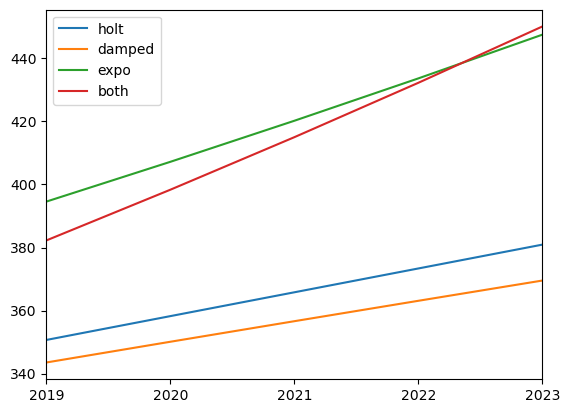

In [20]:
forecast0.plot(label='holt')
forecast1.plot(label='damped')
forecast2.plot(label='expo')
forecast3.plot(label='both')
plt.legend(loc='best')

In [21]:
model = Holt(train_df, damped_trend=True).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,27
Model:,Holt,SSE,99736.852
Optimized:,True,AIC,231.790
Trend:,Additive,BIC,238.269
Seasonal:,None,AICC,237.685
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0343910,alpha,True
smoothing_trend,0.0332467,beta,True


In [22]:
model.params

{'smoothing_level': 0.03439100259942056,
 'smoothing_trend': 0.03324670518819717,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9923715709226552,
 'initial_level': 138.81996969413095,
 'initial_trend': 8.18093988243924,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
fitted_values=model.fittedvalues
fitted_values_df=pd.DataFrame(fitted_values)
fitted_values_df
fitted_values_df.rename(columns = {0:'Fitted_Values'}, inplace = True)
fitted_values_df=fitted_values_df.reset_index(drop=True)

In [24]:
forecast_validation = model.forecast(9)
forecast_validation_df=pd.DataFrame(forecast_validation)
forecast_validation_df
forecast_validation_df.rename(columns = {0:'Forecast'}, inplace = True)

In [25]:
fitted_forecast_df=pd.concat([fitted_values_df,forecast_validation_df])
fitted_forecast_df=fitted_forecast_df.reset_index(drop=True)
fitted_forecast_df

,Fitted_Values,Forecast
0,146.938502,NaN
1,159.224842,NaN
2,166.880673,NaN
3,175.509065,NaN
4,181.521226,NaN
5,189.362479,NaN
6,196.444441,NaN
7,205.440417,NaN
8,213.838235,NaN
9,220.774115,NaN


In [26]:
df_graph=df.reset_index(drop=True)
df_graph

,Yt
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3
5,168.5
6,231.8
7,224.5
8,192.8
9,122.9


In [27]:
final_df=pd.concat([fitted_forecast_df,df_graph],axis=1)

In [28]:
final_df

,Fitted_Values,Forecast,Yt
0,146.938502,NaN,266.0
1,159.224842,NaN,145.9
2,166.880673,NaN,183.1
3,175.509065,NaN,119.3
4,181.521226,NaN,180.3
5,189.362479,NaN,168.5
6,196.444441,NaN,231.8
7,205.440417,NaN,224.5
8,213.838235,NaN,192.8
9,220.774115,NaN,122.9


<AxesSubplot:>

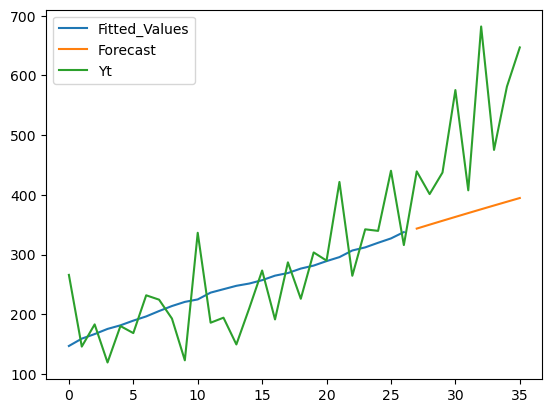

In [29]:
final_df.plot()

In [30]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPE(final_df["Yt"],final_df["Forecast"])

26.21004505706764

In [31]:
model = Holt(df, damped_trend=True).fit(optimized=True)
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Yt,No. Observations:,36
Model:,Holt,SSE,209792.247
Optimized:,True,AIC,322.133
Trend:,Additive,BIC,330.050
Seasonal:,None,AICC,326.133
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3416256,alpha,True
smoothing_trend,0.2690898,beta,True


In [32]:
mp=model.params
smoothing_level = list(mp.values())[0]
smoothing_trend=list(mp.values())[1]
damping_trend=list(mp.values())[3]

In [33]:
final_model = Holt(df,damped_trend=True).fit(smoothing_trend=smoothing_trend,smoothing_level=smoothing_level,damping_trend=damping_trend)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [34]:
final_model.summary()

Dep. Variable:,Yt,No. Observations:,36
Model:,Holt,SSE,208403.787
Optimized:,True,AIC,321.894
Trend:,Additive,BIC,329.811
Seasonal:,None,AICC,325.894
Seasonal Periods:,None,Date:,"Sun, 17 Sep 2023"
Box-Cox:,False,Time:,19:01:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3416256,alpha,False
smoothing_trend,0.2690898,beta,False


In [35]:
forecast_future = final_model.forecast(9)

In [36]:
df_graph=df.reset_index(drop=True)

In [37]:
final=pd.concat([df_graph,forecast_future])

In [38]:
final.rename(columns = {0:'Forecast'}, inplace = True)

In [39]:
final=final.reset_index(drop=True)
final

,Yt,Forecast
0,266.0,NaN
1,145.9,NaN
2,183.1,NaN
3,119.3,NaN
4,180.3,NaN
5,168.5,NaN
6,231.8,NaN
7,224.5,NaN
8,192.8,NaN
9,122.9,NaN


In [40]:
date_range = pd.date_range(start='1992-01-01', periods=45,freq='MS')
date_range_df=pd.DataFrame(date_range)
date_range_df.rename(columns = {0:'Date'}, inplace = True)
date_range_df
final=pd.concat([final,date_range_df],axis=1)
final=final.set_index("Date")
final

,Yt,Forecast
Date,,
1992-01-01,266.0,NaN
1992-02-01,145.9,NaN
1992-03-01,183.1,NaN
1992-04-01,119.3,NaN
1992-05-01,180.3,NaN
1992-06-01,168.5,NaN
1992-07-01,231.8,NaN
1992-08-01,224.5,NaN
1992-09-01,192.8,NaN


<AxesSubplot:xlabel='Date'>

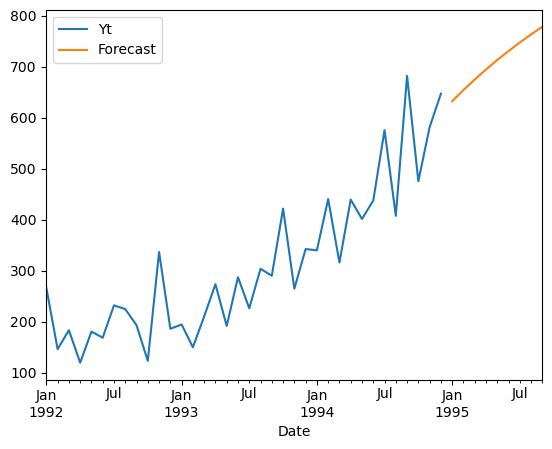

In [41]:
final.plot()